In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
df=yf.download('AAPL',start='2019-11-13',end='2022-12-20')
index=df.index
df.reset_index(inplace=True)
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-12,65.387497,65.697502,65.230003,65.489998,63.802452,87388800
1,2019-11-13,65.282501,66.195000,65.267502,66.117500,64.413795,102734400
2,2019-11-14,65.937500,66.220001,65.525002,65.660004,63.968079,89182800
3,2019-11-15,65.919998,66.445000,65.752502,66.440002,64.727959,100206400
4,2019-11-18,66.449997,66.857498,66.057503,66.775002,65.054359,86703200
...,...,...,...,...,...,...,...
777,2022-12-13,149.500000,149.970001,144.240005,145.470001,144.661423,93886200
778,2022-12-14,145.350006,146.660004,141.160004,143.210007,142.413986,82291200
779,2022-12-15,141.110001,141.800003,136.029999,136.500000,135.741257,98931900
780,2022-12-16,136.690002,137.649994,133.729996,134.509995,133.762314,160156900


In [3]:
inpos=0
for i in df.Close:
    if inpos==0 and i>100:
        inpos=1
        entry=i
        print('Entry :',i)
    elif inpos==1 and i >110:
        inpos=0
        pnl=i-entry
        print('exit',i,pnl)

Entry : 106.26000213623047
exit 110.0625 3.8024978637695312
Entry : 113.90249633789062
exit 111.11250305175781 -2.7899932861328125
Entry : 112.72750091552734
exit 113.01000213623047 0.282501220703125
Entry : 115.01000213623047
exit 114.90750122070312 -0.10250091552734375
Entry : 114.60749816894531
exit 115.5625 0.9550018310546875
Entry : 115.7074966430664
exit 118.2750015258789 2.5675048828125
Entry : 124.37000274658203
exit 125.85749816894531 1.4874954223632812
Entry : 124.82499694824219
exit 126.52249908447266 1.6975021362304688
Entry : 125.01000213623047
exit 124.80750274658203 -0.2024993896484375
Entry : 129.0399932861328
exit 134.17999267578125 5.1399993896484375
Entry : 131.39999389648438
exit 120.87999725341797 -10.519996643066406
Entry : 120.95999908447266
exit 112.81999969482422 -8.139999389648438
Entry : 117.31999969482422
exit 113.48999786376953 -3.8300018310546875
Entry : 112.0
exit 115.36000061035156 3.3600006103515625
Entry : 115.54000091552734
exit 112.12999725341797 -3.

In [4]:
dinpos=0
th=120
pnls=[]
dates=[]
for i,price in enumerate(df.Close):
    if inpos==0 and df.Close.iloc[i-1]<th and df.Close[i]>=th:
        inpos=1
        entry=price
        print('Entry :',price)
    elif inpos==1 and price >th+5:
        inpos=0
        pnl=(price-entry)/entry
        print('exit',price,pnl*100)
        pnls.append(pnl)
        dates.append(i)

exit 125.85749816894531 -4.919919308357349
Entry : 124.4000015258789
exit 127.87999725341797 2.7974241839660423
Entry : 121.08999633789062
exit 125.56999969482422 3.699730359585239
Entry : 123.38999938964844
exit 125.9000015258789 2.0342022438173712


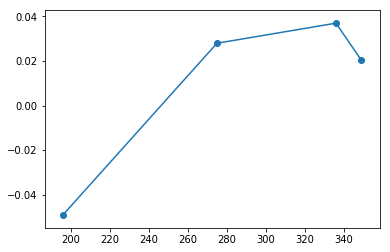

In [5]:
plt.plot(dates,pnls)
plt.scatter(dates,pnls)

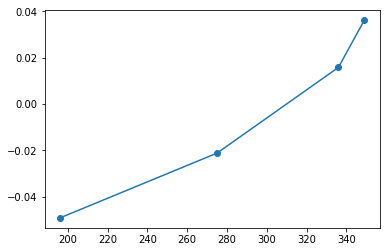

In [6]:
plt.plot(dates,np.cumsum(pnls),'-o')

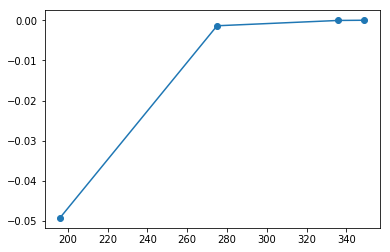

In [7]:
plt.plot(dates,np.cumprod(pnls),'-o')

In [8]:
index[dates]

DatetimeIndex(['2020-08-24', '2020-12-15', '2021-03-16', '2021-04-05'], dtype='datetime64[ns]', name='Date', freq=None)

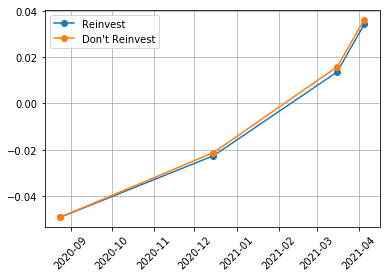

In [9]:
#Compunding Effect
plt.plot(np.array(index[dates]),np.cumprod(1+np.array(pnls))-1,'-o',label="Reinvest")#Reinvest our profit
plt.plot(np.array(index[dates]),np.cumsum(pnls),'-o',label="Don't Reinvest")#Don't Reinvest our profit
plt.xticks(rotation=45)
plt.grid()
plt.legend()

In [10]:
spy=yf.download('SPY',start='2010-01-01',end='2022-12-20')
index=spy.index
#spy.reset_index(inplace=True)
spy

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,112.769997,112.800003,111.389999,111.440002,86.024239,90637900
2010-01-04,112.370003,113.389999,111.510002,113.330002,87.483215,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,87.714790,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,87.776550,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,88.147057,131091100
...,...,...,...,...,...,...
2022-12-13,410.220001,410.489990,399.070007,401.970001,395.740204,123782500
2022-12-14,401.609985,405.500000,396.309998,399.399994,393.210022,108111300
2022-12-15,394.299988,395.250000,387.890015,389.630005,383.591431,117705900


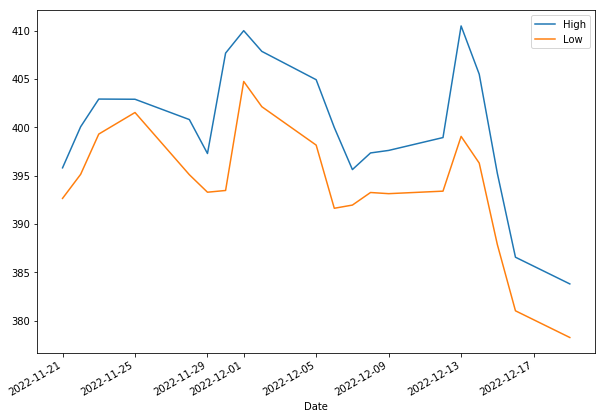

In [11]:
spy[['High','Low']].iloc[-20:].plot(figsize=[10,7])

In [12]:
dinpos=0
th=380
pnls=[]
dates=[]
for i,price in enumerate(spy.Close):
    if inpos==0 and spy.Close.iloc[i-1]<th and spy.Close[i]>=th:
        inpos=1
        entry=price
        print('Entry :',price)
    elif inpos==1 and price >th+5:
        inpos=0
        pnl=(price-entry)/entry
        print('exit',price,pnl*100)
        pnls.append(pnl)
        dates.append(i)

Entry : 381.260009765625
exit 386.19000244140625 1.293078883046744
Entry : 383.6300048828125
exit 387.1700134277344 0.9227663373210971
Entry : 390.0799865722656
exit 388.5899963378906 -0.3819704382857301
Entry : 381.239990234375
exit 388.989990234375 2.032840257716807
Entry : 385.1300048828125
exit 392.2699890136719 1.8539153118002145
Entry : 384.9200134277344
exit 389.0199890136719 1.0651500163441716
Entry : 382.0
exit 394.69000244140625 3.321990167907395


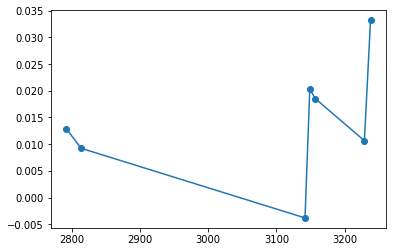

In [13]:
plt.plot(dates,pnls,'-o')

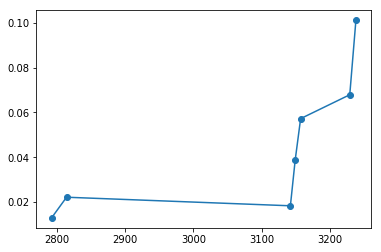

In [14]:
plt.plot(dates,np.cumsum(pnls),'-o')

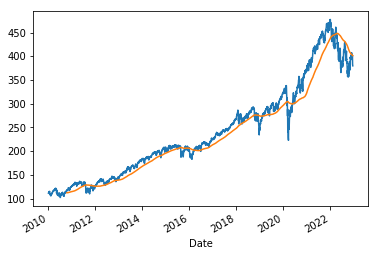

In [15]:
spy.Close.plot()
spy.Close.rolling(200).mean().plot()

In [16]:
#Long_side
inpos=0
pnls=[]
dates=[]
for i,price in enumerate(spy.Close):
    ma=spy.Close.iloc[i-200:i].mean()
    if inpos==0 and ma>price:
        inpos=1
        entry=price
        print('entry',entry)
    elif inpos==1 and ma<price:
        pnl=(price-entry)/entry*inpos
        inpos=0
        print('Exit :',price,pnl*100)
        pnls.append(pnl)
        dates.append(i)
        

entry 125.48999786376953
Exit : 128.6300048828125 2.502197045577866
entry 125.5
Exit : 127.87999725341797 1.8964121541179033
entry 123.16000366210938
Exit : 126.7300033569336 2.8986680648520817
entry 123.94999694824219
Exit : 126.38999938964844 1.9685377180163401
entry 124.83000183105469
Exit : 126.12000274658203 1.0334061496476104
entry 125.5
Exit : 127.5 1.593625498007968
entry 128.16000366210938
Exit : 129.07000732421875 0.7100527747397517
entry 138.0399932861328
Exit : 139.1300048828125 0.7896346346672762
entry 190.5399932861328
Exit : 194.07000732421875 1.8526368019678343
entry 204.52999877929688
Exit : 207.47999572753906 1.4423297148822918
entry 203.97000122070312
Exit : 207.50999450683594 1.7355460435098045
entry 204.83999633789062
Exit : 208.72999572753906 1.8990428916195397
entry 205.61000061035156
Exit : 209.6199951171875 1.9502915689569098
entry 205.33999633789062
Exit : 208.02999877929688 1.3100236141914618
entry 204.86000061035156
Exit : 207.39999389648438 1.23986785051511

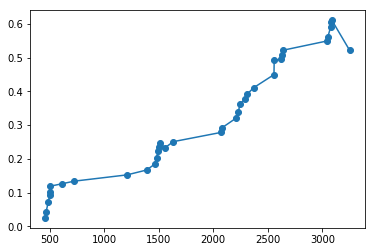

In [17]:
plt.plot(dates,np.cumsum(pnls),'-o')

In [18]:
#short_side
inpos=0
pnls=[]
dates=[]
for i,price in enumerate(spy.Close):
    ma=spy.Close.iloc[i-200:i].mean()
    if inpos==0 and ma<price:
        inpos=1
        entry=price
        print('entry',entry)
    elif inpos==1 and ma>price:
        pnl=(price-entry)/entry*inpos
        inpos=0
        print('Exit :',price,pnl*100)
        pnls.append(pnl)
        dates.append(i)
        

entry 118.27999877929688
Exit : 125.48999786376953 6.095704395403374
entry 128.6300048828125
Exit : 125.5 -2.433339628389247
entry 127.87999725341797
Exit : 123.16000366210938 -3.6909553430432513
entry 126.7300033569336
Exit : 123.94999694824219 -2.1936450209517866
entry 126.38999938964844
Exit : 124.83000183105469 -1.2342729378330202
entry 126.12000274658203
Exit : 125.5 -0.49159747310490276
entry 127.5
Exit : 128.16000366210938 0.5176499310661765
entry 129.07000732421875
Exit : 138.0399932861328 6.949705937012782
entry 139.1300048828125
Exit : 190.5399932861328 36.95104334009211
entry 194.07000732421875
Exit : 204.52999877929688 5.389803194886973
entry 207.47999572753906
Exit : 203.97000122070312 -1.6917267105814056
entry 207.50999450683594
Exit : 204.83999633789062 -1.286684130704536
entry 208.72999572753906
Exit : 205.61000061035156 -1.494751679705927
entry 209.6199951171875
Exit : 205.33999633789062 -2.041789370763105
entry 208.02999877929688
Exit : 204.86000061035156 -1.523817808

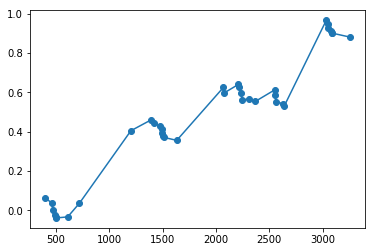

In [19]:
plt.plot(dates,np.cumsum(pnls),'-o')